# Classify handwritten digits using the famous MNIST data
- Digit Recognizer
- dataset : https://www.kaggle.com/c/digit-recognizer

## 0. Introduction
- We just do rough modeling here. because **it's important to know this model works well or not, and see how data is look like.**
- This is First Analysis **only using train.csv**, precisely only using 20000 data sample of 42000 raw data ( using test.csv is comming next notebook )
- **Only used Logsitic Regression model here** (developing & using another models are comming next notebook )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

---
## 1. Data load & Showing DataFrame
- MNIST-dataset/train.csv
 - 51.1MB
 - samples : 41999
 - y : label
 - X : pixel0 ~ pixel783


- data description from https://www.kaggle.com/c/digit-recognizer/data
 - The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.
 - Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
 - The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

In [2]:
df = pd.read_csv("./DATA/MNIST-dataset/train.csv")
dfy = df.label
dfX = df.ix[:,1:]
df.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---
## 2. Data description & Showing Sample
- seaborn distplot : http://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

In [3]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


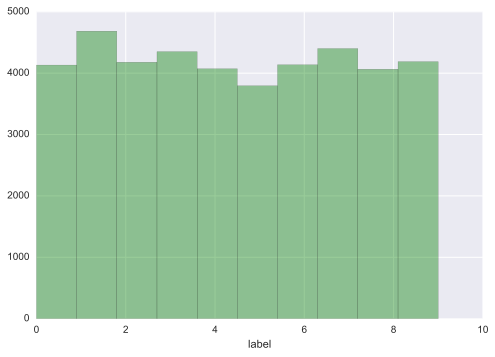

In [4]:
sns.distplot(dfy, bins=10, kde=False, color='g');

### Visualizing for showing sample
- reshaping 784 pixels ( feature ) to 28x28 matrix form
- visualizing sample

In [5]:
(784)**(1/2)

28.0

In [6]:
def showing_sample(i):
    img = dfX.ix[i].as_matrix()
    img = img.reshape(28, 28)
    plt.imshow(img)
    plt.title("Real Number is {}".format(dfy[i]))

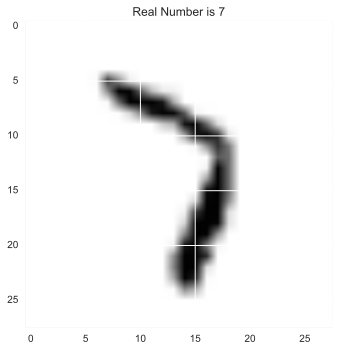

In [7]:
# 9000th sample
showing_sample(9000)

---
## 3. Split Test & Traing sets
- using only 20000 data sample of 42000 because of training speed
- train y, X : 18000
- test y, X : 2000

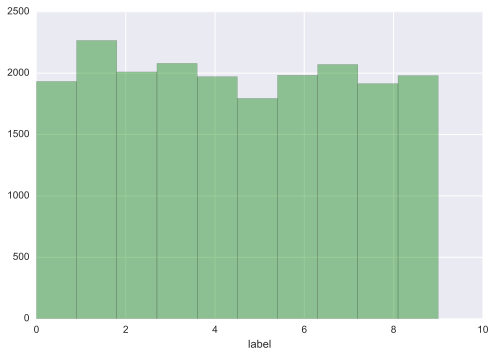

In [8]:
# split 20000 sample data from 42000 raw data.
# show y class is pretty equivalent.
dfX1 = dfX[:20000]
dfy1 = dfy[:20000]
sns.distplot(dfy1, bins=10, kde=False, color='g');

18000 2000


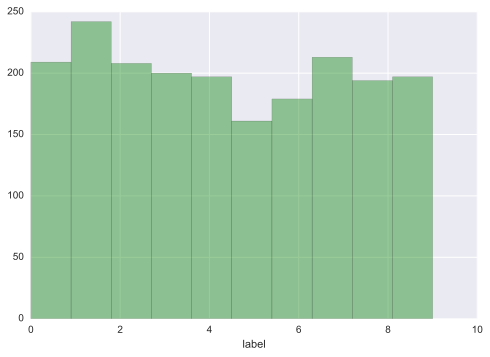

In [9]:
# split 18000 train data, 2000 test data.
# show y class in test data is pretty equivalent.
y_train = dfy1[:18000]
y_test = dfy1[18000:]
X_train = dfX1[:18000]
X_test = dfX1[18000:]

print(len(y_train), len(y_test))
sns.distplot(y_test, bins=10, kde=False, color='g');

---
## 4. Modeling - Logistic Regression
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### Model fitting ( training ) & Test
- solver : {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’}, default: ‘liblinear’
- Algorithm to use in the optimization problem.
 - **For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ is faster for large ones.**
 - **For multiclass problems, only ‘newton-cg’, ‘sag’ and ‘lbfgs’ handle**

**lbfgs**

In [10]:
model = LogisticRegression(C=1.0, solver="lbfgs", max_iter=15, multi_class="multinomial")
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=15, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
model.score(X_train, y_train)

0.91138888888888892

In [12]:
model.score(X_test, y_test)

0.90149999999999997

**newton-cg**

In [13]:
model = LogisticRegression(C=1.0, solver="newton-cg", max_iter=9, multi_class="multinomial")
model.fit(X_train, y_train)

/Users/jkpark/.pyenv/versions/3.5.1/envs/dss/lib/python3.5/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=9, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
model.score(X_train, y_train)

0.96033333333333337

In [15]:
model.score(X_test, y_test)

0.90449999999999997

**sag**

In [16]:
model = LogisticRegression(C=1.0, solver="sag", max_iter=9, multi_class="multinomial")
model.fit(X_train, y_train)

/Users/jkpark/.pyenv/versions/3.5.1/envs/dss/lib/python3.5/site-packages/sklearn/linear_model/sag.py:286: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=9, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
model.score(X_train, y_train)

0.94111111111111112

In [18]:
model.score(X_test, y_test)

0.91649999999999998

**liblinear**

In [19]:
model = LogisticRegression(C=1.0, max_iter=9)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=9, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
model.score(X_train, y_train)

0.93338888888888893

In [21]:
model.score(X_test, y_test)

0.91700000000000004

---
## 5. Prediction
- find invalid predicted data
- show that image, predicted value & real value

In [22]:
y_pred = model.predict(X_test)
y_match = y_pred == y_test
print("# of invalid predicted data is", np.count_nonzero(y_pred == y_test))
y_match

# of invalid predicted data is 1834


18000     True
18001     True
18002     True
18003     True
18004     True
18005     True
18006     True
18007     True
18008     True
18009     True
18010     True
18011     True
18012     True
18013     True
18014     True
18015     True
18016     True
18017     True
18018     True
18019     True
18020     True
18021     True
18022     True
18023     True
18024     True
18025     True
18026     True
18027     True
18028     True
18029     True
         ...  
19970     True
19971     True
19972     True
19973    False
19974     True
19975     True
19976     True
19977    False
19978     True
19979    False
19980     True
19981     True
19982     True
19983     True
19984     True
19985     True
19986     True
19987     True
19988     True
19989     True
19990     True
19991     True
19992     True
19993     True
19994     True
19995     True
19996     True
19997     True
19998    False
19999     True
Name: label, dtype: bool

In [23]:
y_pred = model.predict(X_test)

def showing_predict_number(i):
    img = X_test.ix[i].as_matrix()
    img = img.reshape(28, 28)
    plt.imshow(img)
    plt.title("Real Number is {}, and predicted number is {}".format(y_test[i], y_pred[i-18000]))

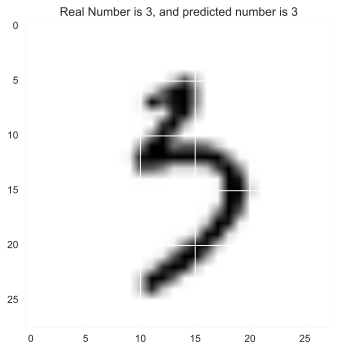

In [24]:
showing_predict_number(18016)

## +++ Next Notebook will handle following contents for development +++
0. Another Models ( SVM, SGD, Navie bayes ... )
1. Cross Validation
2. Parameter Estimation
3. One Standard Error Rule
4. FInal Test
5. Metric, Visualization - ROC curve, AUC, Precision-Recall curve